# Exercise 1a

## 1. Monte-Carlo Simulation

### 1.1 Data Creation and Visualization
#### Method
- Let X be a random variable whose distribution can be described by the cumulative distribution function $F_{x}$.
- We want to generate values of X which are distributed according to this distribution.

The inverse transform sampling method works as follows:

1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Find the inverse of the desired CDF, e.g. $F^{-1}_{X}(x)$.
3. Compute $X = F^{-1}_{X}(u)$. The computed random variable $X$ has distribution $F_{X}(x)$.
---
Information taken from [Wikipedia](https://en.wikipedia.org/wiki/Inverse_transform_sampling)

#### Application
Sampling $p(Y=0) = p(Y=1) = \frac{1}{2}$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Round random number to 1 if it is $\geq$ 0.5, otherwise round it to 0.

Sampling $p(X=x|Y=0) = 2-2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2-2x\,dx $$
$$F_{X}(x) = 2x-x^{2} $$
$$F^{-1}_{X}(x) = 1-\sqrt{1-x}, 1+\sqrt{1-x}$$

3. Compute $X = 1-\sqrt{1-u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2-2x$

Sampling $p(X=x|Y=1) = 2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2x\,dx $$
$$F_{X}(x) = x^{2} $$
$$F^{-1}_{X}(x) = -\sqrt{x}, \sqrt{x}$$

3. Compute $X = \sqrt{u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2x$

In [1]:
import numpy.random as random
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
def p0():
    return 1- math.sqrt(1-random.random())

def p1():
    return math.sqrt(random.random())

# Returns an Array [[N/2 samples for p(X|Y=0)], [N/2 samples for p(X|Y=1)]]
def create_data (N):
    
    Y = random.randint(0, 2, size=N)
    X = np.vectorize(lambda x: p0() if x == 0 else p1())

    return X(Y), Y

In [9]:
X, Y = create_data(1000000)

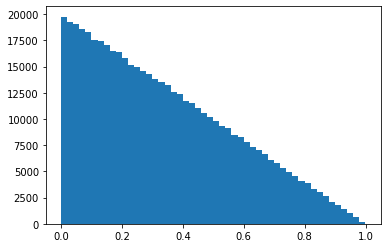

In [15]:
plt1 = plt.hist([x for x, y in zip(X, Y) if y == 0], bins=50)

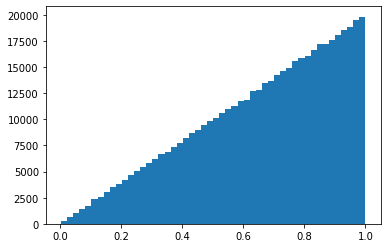

In [17]:
plt2 = plt.hist([x for x, y in zip(X, Y) if y == 1], bins=50)

### 1.2 Classification by Thresholding

In [19]:
def fA(X,x_t):
    return int(X >= x_t)

def fB(X,x_t):
    return int(X < x_t)

In [20]:
def test(M, t, f):
    errors = []
    for i in range(10):
        data = create_data(M)
        data0 = data[0]
        data1 = data[1]

        data0thresholds = [f(elem, t) for elem in data0]
        data0ones = list(filter(lambda elem: elem == 1, data0thresholds))
        data0error = len(data0ones)

        data1thresholds = [f(elem, t) for elem in data1]
        data1zeros = list(filter(lambda elem: elem == 0, data1thresholds))
        data1error = len(data1zeros)

        error = (data0error + data1error) / (len(data0) + len(data1))
        errors.append(error)
    return errors

In [21]:
def mean_error(error_rates):
    return sum(error_rates) / len(error_rates)

def standard_deviation_error(mean_error, error_rates):
    return sum([abs(mean_error - elem) for elem in error_rates]) / len(error_rates)

def errors(error_rates):
    meanError = mean_error(error_rates)
    standardDeviationError = standard_deviation_error(meanError, error_rates)
    return meanError, standardDeviationError

In [40]:
TEST_DATA_SIZES = [10, 100, 1000, 10_000]

def experiment(threshold, f):
    error_rates = [errors(test(size, threshold, f)) for size in TEST_DATA_SIZES]
    print(error_rates[0])
    mean_errors = [err for err, _ in error_rates]
    std_deviations = [deviation for _, deviation in error_rates]
    
    plt.plot(TEST_DATA_SIZES, mean_errors, label="t = "+str(threshold))
    plt.errorbar(TEST_DATA_SIZES, mean_errors, yerr=std_deviations, ecolor="red" ,ls="None")
    plt.legend(loc="lower right")
    plt.xscale("log")

[0.5, 0.0]
[0.625, 0.07999999999999999]
[0.4800000000000001, 0.049999999999999996]
[0.42000000000000004, 0.05]


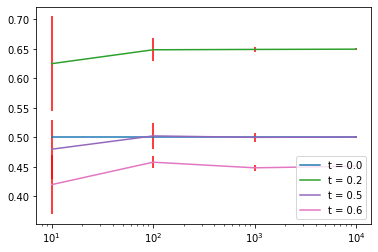

In [41]:
experiment(0.0, fA)
experiment(0.2, fA)
experiment(0.5, fA)
experiment(0.6, fA)

Theoretical error rates:
$$p(error|A;x_{t}) = \frac{1}{4} + (x_{t} - \frac{1}{2})^{2}$$
$$p(error|A;0.0) = \frac{1}{4} + (0.0 - \frac{1}{2})^{2} = 0.5$$
$$p(error|A;0.2) = \frac{1}{4} + (0.2 - \frac{1}{2})^{2} = 0.34$$
$$p(error|A;0.5) = \frac{1}{4} + (0.5 - \frac{1}{2})^{2} = 0.25$$
$$p(error|A;0.6) = \frac{1}{4} + (0.6 - \frac{1}{2})^{2} = 0.26$$

The error standard deviation decreases exponentially with increasing M.
If one compares the expected error rates with the computed error rates, one can see that they are equal for $ M \to \infty $.


### 1.3 Baseline Classifiers

In [117]:
def fC(X,t):
    r = random.random()
    u = 1 if r >= 0.5 else 0
    return u

def fD(X,t):
    return 1

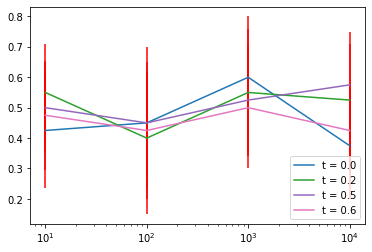

In [118]:
experiment(0.0, fC)
experiment(0.2, fC)
experiment(0.5, fC)
experiment(0.6, fC)

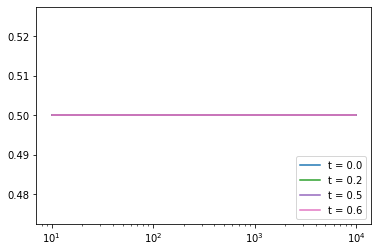

In [119]:
experiment(0.0, fD)
experiment(0.2, fD)
experiment(0.5, fD)
experiment(0.6, fD)

### 1.4 Nearest Neighbor Classification

In [66]:
def toy_nearest_neighbor_singular(X, Xtrain, Ytrain):
    diff = np.array(list(map(lambda elem: abs(X - elem), Xtrain)))
    smallestElemIndex = np.argmin(diff)
    Y = Ytrain[smallestElemIndex]
    return Y 

def toy_nearest_neighbor(Xtest, Xtrain, Ytrain):
    Ytest = list(map(lambda elem: toy_nearest_neighbor_singular(elem, Xtrain, Ytrain), Xtest))
    return Ytest

In [108]:
def testNNC(N, M):
    train = create_data(N)
    Xtrain = train[0] + train[1]
    Ytrain = [0]*len(train[0]) + [1]*len(train[1])

    test = create_data(M)
    Xtest = test[0] + test[1]

    Ytest = toy_nearest_neighbor(Xtest, Xtrain, Ytrain)

    length = len(Ytest)
    middle_index = length // 2
    first_half = Ytest[:middle_index]
    second_half = Ytest[middle_index:]

    errors_first_half = sum(first_half)
    errors_second_half = len(second_half) - sum(second_half)

    error_rate = (errors_first_half + errors_second_half) / length
    return error_rate

In [123]:
def experimentNCC(WDH, N, M):
    error_rates = []
    for i in range(WDH):
        error_rate = testNNC(N, M)
        error_rates.append(error_rate)
    return sum(error_rates) / len(error_rates)

In [130]:
experimentNCC(100, 2, 100)

0.35629999999999995

In [131]:
experimentNCC(100, 100, 100)

0.32689999999999986